In [14]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
class MoneyAgent(Agent):
    ## An agent with fixed wealth
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
    
    def step(self):
        if self.wealth == 0:
            return
        other_agent = random.choice(self.model.schedule.agents)
        other_agent.wealth += 1
        self.wealth -= 1
        
class MoneyModel(Model):
    ## A model with some number of agents
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        #Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
    def step(self):
        ## Advance the model by one step
        self.schedule.step()

In [22]:
model = MoneyModel(10)

for i in range(10):
    model.step()

0
1
1
1
1
1
1
1
2
1
0
0
1
1
1
1
1
1
3
1
0
1
0
1
1
1
1
1
3
1
0
1
0
0
2
1
1
1
3
1
0
1
0
0
1
2
1
1
3
1
0
2
0
0
1
1
1
1
3
1
0
2
0
0
1
1
0
2
3
1
1
2
0
0
1
1
0
1
3
1
1
2
0
1
1
1
0
1
2
1
1
2
0
1
2
1
0
1
2
0
1
2
0
1
1
0
2
1
1
1
1
1
0
1
1
0
3
1
1
1
1
1
0
0
1
1
3
1
1
1
1
1
0
0
0
1
3
2
1
1
1
1
0
0
0
0
3
3
1
1
1
1
0
0
0
0
2
3
2
1
1
1
1
0
0
0
2
2
2
1
1
1
2
0
0
0
2
2
1
1
1
1
2
1
0
0
2
2
1
0
1
0
1
1
1
2
0
1
1
2
1
0
0
1
1
3
0
1
1
2
1
1
0
0
1
3
0
1
1
2
1
1
0
0
0
3
0
2
1
2
1
1
0
0
0
2
0
2
1
3
1
1
0
0
0
3
0
1
1
3
1
1
0
0
0
3
0
1
1
3
1
2
0
0
0
3
0
1
1
2
1
0
0
2
1
2
0
1
0
3
1
0
0
1
2
2
0
1
0
3
1
0
0
1
1
2
0
2
0
3
1
0
0
1
1
1
0
2
0
4
1
0
1
1
1
1
0
1
0
4
1
0
2
1
1
1
0
1
0
3
0
2
3
0
1
2
1
0
1
0
0
1
3
0
1
3
1
0
1
0
0
1
2
0
1
3
1
1
1
0
0
1
2
1
0
3
1
1
1
0
0
1
2
2
0
2
1
1
1
0
0
1
2
2
0
2
1
1
1
0
0
1
2
3
0
2
1
0
1
0
1
1
2
3
0
2
1
0
0
0
0
2
3
1
2
1
0
1
0
0
0
1
3
1
2
1
0
2
0
0
0
1
2
1
3
1
0
2
0
0
1
1
2
0
3
1
0
2
0
0
1
2
2
0
2
1
0
2
0
0
1
2
3
0
2
0
0
2
0
0
2
2
3
0
2
0
0
1
0
0
0
0
1
0
0
2
2
3
0
2
0
1
0
0
0
2
2
3
0
2


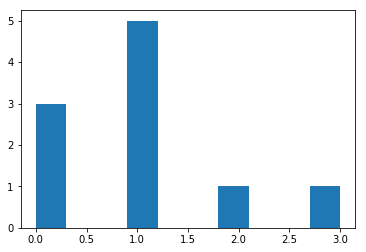

In [15]:
agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)
plt.show()

(array([ 434.,  308.,  152.,   61.,   28.,   12.,    3.,    2.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 8 Patch objects>)

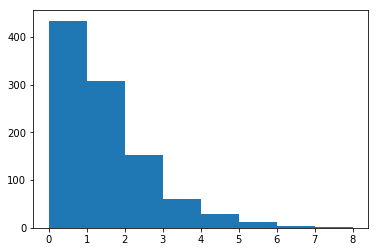

In [16]:
all_wealth = []

for j in range(100):
    
    model = MoneyModel(10)
    for i in range(10):
        model.step()
        
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)
        
plt.hist(all_wealth, bins = range(max(all_wealth) + 1))